# Neural Networks (convolutional)

### 1. Read our fashion data set
### 2. Create our model
### 3. Train the model
### 4. Predict images 

How it works:
<img src="nnn.jpg" style="height:300px">

This is the fashion data set. 

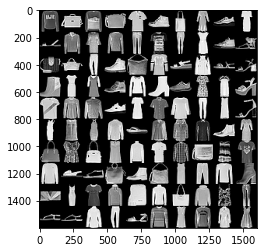

In [27]:
import matplotlib.image as mpimg
img=mpimg.imread('R8120eceb63c1a6f9957934a26dd2fc6a.jpg')
imgplot = plt.imshow(img)

In [28]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd

We will be building a model that will focus on trying to predict the image based on the fashion dataset. 
Tensor flow and Keras are packages that will help us build this Neural Network.

In [29]:
data = tf.keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = data.load_data() 

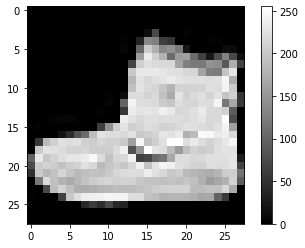

In [30]:
plt.imshow(train_x[0], cmap = "gist_gray")
plt.colorbar()
plt.show()

In [31]:
#take a look at the size
print(train_x.shape)
print(test_x.shape)

(60000, 28, 28)
(10000, 28, 28)


When we add a color bar to the graph we can see the color scale falls from a range of 0 to 250. By dividing the image (x) values by 255 we can scale them to a more reasonable scale.

In [32]:
train_x = train_x/255
test_x = test_x/255

In [33]:
#take a look at first entry
train_x[0,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

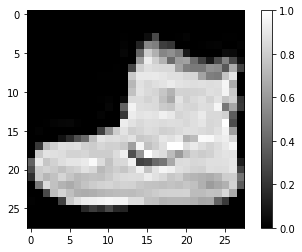

In [34]:
plt.imshow(train_x[0], cmap = "gist_gray")
plt.colorbar()
plt.show()

The color bar above now shows a 0 to 1 scale. We can now build our predictor model.

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(120, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(train_x, train_y, epochs=8) #epochs of 8 tests
plt.show()

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6248 - accuracy: 0.7839
Epoch 2/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3703 - accuracy: 0.8648
Epoch 3/8
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3280 - accuracy: 0.8803
Epoch 4/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3069 - accuracy: 0.8843
Epoch 5/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2948 - accuracy: 0.8901
Epoch 6/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2730 - accuracy: 0.8963
Epoch 7/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2642 - accuracy: 0.9013
Epoch 8/8
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2490 - accuracy: 0.9052


In [36]:
test_f, test_acc = model.evaluate(test_x,  test_y, verbose=2)
print('')
print('Testing Accuracy:', test_acc)
print('Testing failure:', test_f)

313/313 - 0s - loss: 0.3415 - accuracy: 0.8824

Testing Accuracy: 0.8823999762535095
Testing failure: 0.3415132164955139


According to our testing and accuracy summary we have a 88% chance to correctly predict the image.

In [37]:
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Bag', 'Ankle boot']

You can find the class names here: https://github.com/zalandoresearch/fashion-mnist

In [38]:
probability = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability.predict(test_x)

This function will first give us the predicted value that the model returns. Then it will print the actual value of the image,  followed by the image the model is running tests on.

In [39]:
def predict(i): #simple single value predictor function
    print("Predicted image value: ", class_names[np.argmax(predictions[i])])#shows the models predicton
    print("Image correct label: ", class_names[test_y[i]])#shows the correct label
    plt.imshow(test_x[i], cmap = "gist_gray")#prints image

Predicted image value:  Trouser
Image correct label:  Trouser


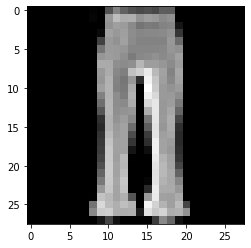

In [40]:
predict(np.random.randint(0,10000))

Predicted image value:  Sandal
Image correct label:  Sandal


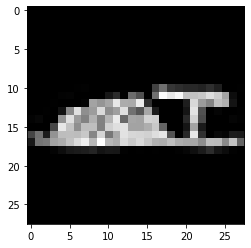

In [43]:
predict(np.random.randint(0,10000))

Predicted image value:  Ankle boot
Image correct label:  Ankle boot


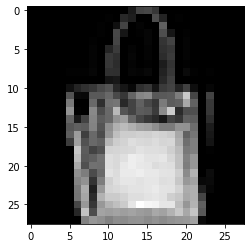

In [42]:
predict(np.random.randint(0,10000))

References:

https://www.youtube.com/watch?v=cQV3s2UKk30

https://www.youtube.com/watch?v=eRs7Aa6CWDU&t=573s

https://stackoverflow.com/questions/34725495/can-i-use-a-neural-network-for-regression-when-input-has-multiple-output-values